# Import libraries and dataset

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import joblib

In [2]:
df= pd.read_csv(r"C:\Users\sad57\Downloads\archive\Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Exploring Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df[['Age','Annual Income (k$)', 'Spending Score (1-100)']].describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [7]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

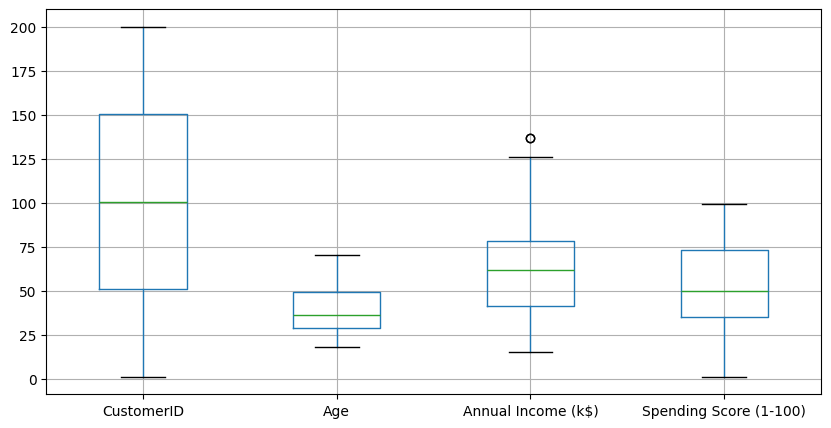

In [ ]:
# Check Outlires

In [20]:
df['Age'].agg(['max', 'min'])

max    70
min    18
Name: Age, dtype: int64

In [22]:
df['Annual Income (k$)'].agg(['max', 'min'])

max    137
min     15
Name: Annual Income (k$), dtype: int64

In [23]:
df['Spending Score (1-100)'].agg(['max', 'min'])

max    99
min     1
Name: Spending Score (1-100), dtype: int64

# EDA

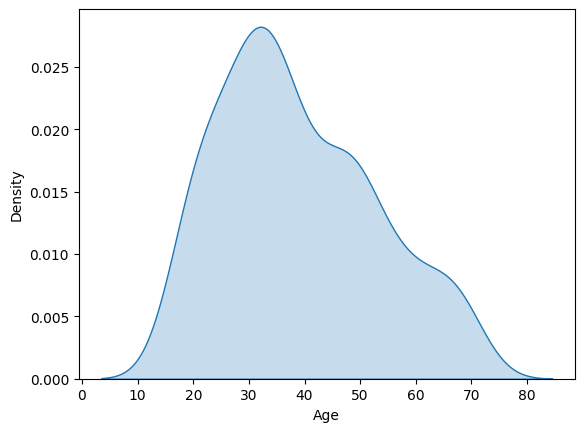

In [27]:
# 1- Age distribution
sns.kdeplot(df['Age'], fill=True)
plt.show()

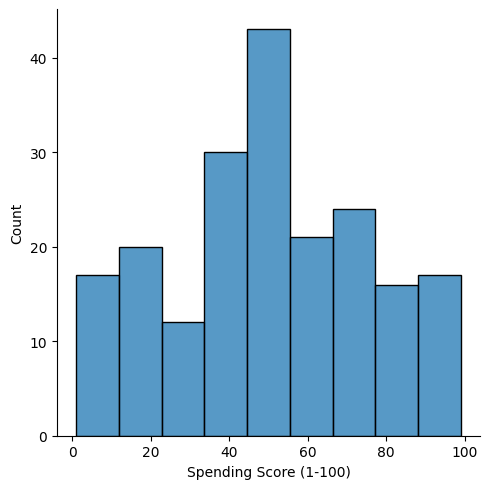

In [33]:
# 2- .🔍  distribution of spending scores
sns.displot(data=df, x= 'Spending Score (1-100)')
plt.show()

In [57]:
df['Age Label']= pd.cut(df['Age'], bins= [18, 27, 37, 47, 57, 70], labels= ['Youth', 'Young Adults', 'Middle-aged Adults', 'Older Adults', 'Seniors']
, right=True)

In [58]:
df['Age Label'].value_counts()

Age Label
Young Adults          61
Youth                 42
Middle-aged Adults    36
Older Adults          31
Seniors               26
Name: count, dtype: int64

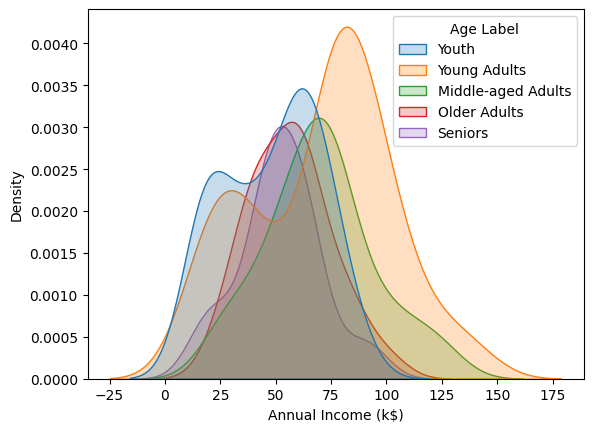

In [59]:
# 🔍 3. What is the distribution Annual Income (k$) of across different age groups
sns.kdeplot(data=df, x='Annual Income (k$)' ,hue='Age Label', fill=True)
plt.show()

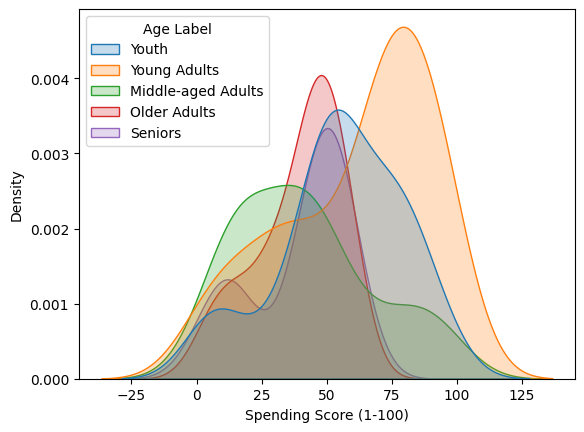

In [ ]:
# 🔍 4. What is the distribution Spending Scores of across different age groups
sns.kdeplot(data=df, x='Spending Score (1-100)' ,hue='Age Label', fill=True)
plt.show()

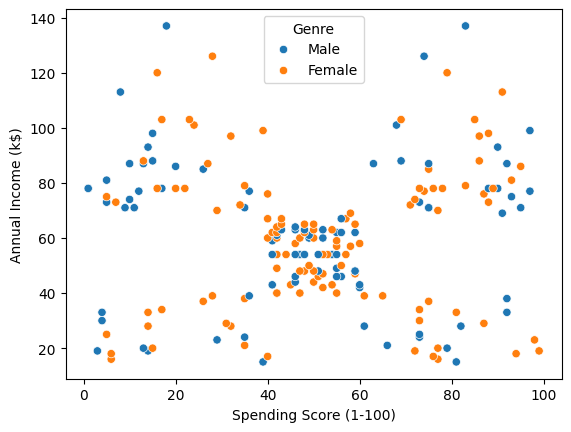

In [65]:
# 📊 5. Is there a correlation between annual income and spending score
sns.scatterplot(data=df, x= 'Spending Score (1-100)', y= 'Annual Income (k$)', hue='Genre')
plt.show()

In [66]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Age Label
0,1,Male,19,15,39,Youth
1,2,Male,21,15,81,Youth
2,3,Female,20,16,6,Youth
3,4,Female,23,16,77,Youth
4,5,Female,31,17,40,Young Adults
...,...,...,...,...,...,...
195,196,Female,35,120,79,Young Adults
196,197,Female,45,126,28,Middle-aged Adults
197,198,Male,32,126,74,Young Adults
198,199,Male,32,137,18,Young Adults


# Preprocessing & Feature Engineering

In [70]:
X= df[['Age','Annual Income (k$)', 'Spending Score (1-100)']]
X

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [71]:
scaler= StandardScaler()

In [72]:
X_scaled= scaler.fit_transform(X)
X_scaled

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

# # Model Building

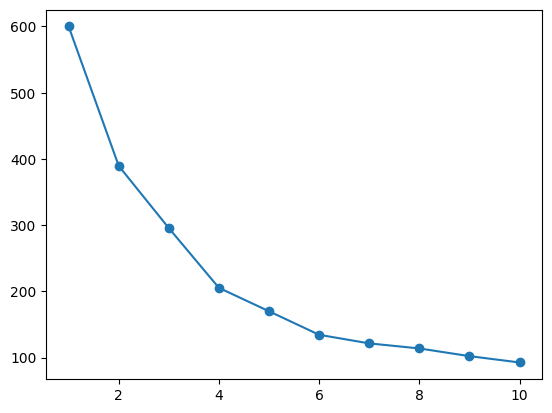

In [76]:
inertia= []
for k in range(1, 11): 
    kmeans= KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


plt.plot(range(1, 11),inertia, marker= 'o')
plt.show()

In [77]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [78]:
kmeans.labels_

array([2, 2, 3, 2, 2, 2, 3, 2, 0, 2, 0, 2, 0, 2, 3, 2, 3, 2, 0, 2, 3, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 3, 2, 0, 2, 0, 2,
       0, 2, 0, 3, 3, 3, 0, 2, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 1, 1, 3, 1, 4, 1, 4, 1, 4, 1,
       3, 1, 3, 1, 4, 1, 3, 1, 4, 1, 3, 1, 3, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 3, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1], dtype=int32)

In [91]:
kmeans.predict(np.array([[22, 15000, 20]]))

array([4], dtype=int32)

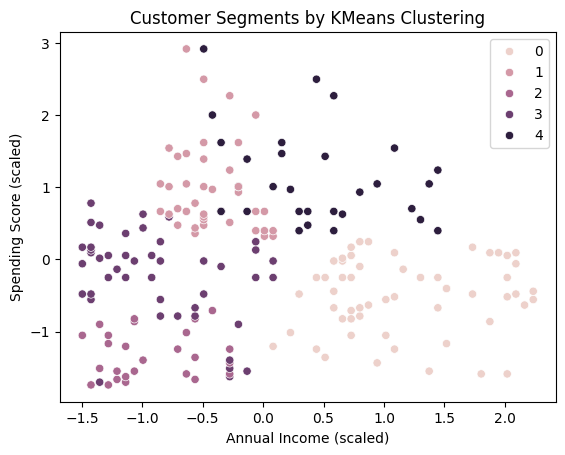

In [81]:
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=kmeans.labels_)
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title('Customer Segments by KMeans Clustering')
plt.show()

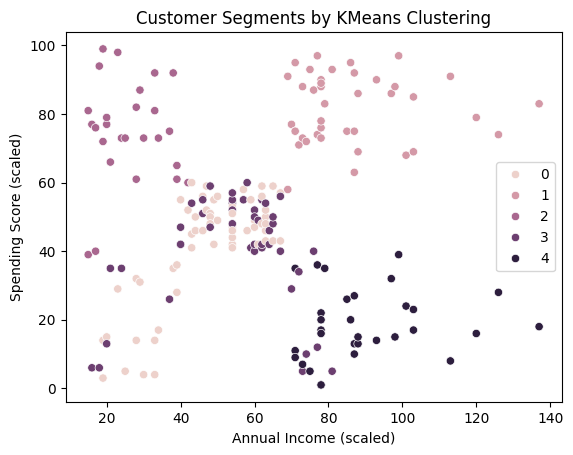

In [88]:
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=kmeans.labels_)
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title('Customer Segments by KMeans Clustering')
plt.show()

In [82]:
df['Cluster']= kmeans.labels_

In [83]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Age Label,Cluster
0,1,Male,19,15,39,Youth,2
1,2,Male,21,15,81,Youth,2
2,3,Female,20,16,6,Youth,3
3,4,Female,23,16,77,Youth,2
4,5,Female,31,17,40,Young Adults,2
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,Young Adults,1
196,197,Female,45,126,28,Middle-aged Adults,4
197,198,Male,32,126,74,Young Adults,1
198,199,Male,32,137,18,Young Adults,4


#  Save model and scaler

In [84]:
joblib.dump(kmeans, 'kmeans_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

# thnx for your time you can use model from following link: []

In [93]:
import numpy as np
import joblib

# Load model and scaler
kmeans = joblib.load('kmeans_model.pkl')
scaler = joblib.load('scaler.pkl')

# Example new input
new_customer = np.array([[40, 40, 50]])  # Age, Income, Score

# Scale
scaled_input = scaler.transform(new_customer)

# Predict
cluster = kmeans.predict(scaled_input)
print(f"Predicted Cluster: {cluster[0]}")


Predicted Cluster: 3


c:\Users\sad57\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
